# Combine Drought Data and National Park Data

A. Stein 12.3.21

Got shapefiles here: [https://earthworks.stanford.edu/catalog/stanford-mg196xb7926](https://earthworks.stanford.edu/catalog/stanford-mg196xb7926)

In [2]:
%pylab inline
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

import xarray as xr
import pandas as pd
from netCDF4 import Dataset
from tqdm.notebook import tqdm

import geopandas as gpd
#import contextily as cx

cwd = '/pool0/home/steinadi/data/drought/drought_impact/data'

Populating the interactive namespace from numpy and matplotlib
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
fdsi = xr.open_dataset(f"{cwd}/fdsi.nc") # EPSG:4326
leri = xr.open_dataset(f"{cwd}/leri.nc") 
mcdi = xr.open_dataset(f"{cwd}/mcdi.nc")
vegdri = xr.open_dataset(f"{cwd}/vegdri.nc")

In [11]:
vegdri

<xarray.Dataset>
Dimensions:  (lat: 2687, lon: 5791, time: 84)
Coordinates:
  * lat      (lat) float64 51.77 51.75 51.74 51.73 ... 22.51 22.5 22.49 22.48
  * lon      (lon) float64 -128.5 -128.5 -128.5 -128.5 ... -65.42 -65.41 -65.4
  * time     (time) datetime64[ns] 2019-03-10 2019-03-17 ... 2020-10-11
Data variables:
    vegdri   (lat, lon, time) float64 ...

fig, axs = plt.subplots(2,2, figsize=(15,8))
ax = axs.ravel()

fdsi.sel(year=2020)['fdsi'].plot(ax=ax[0])
leri.sel(time='2021-10')['leri'].plot(ax=ax[1])
mcdi.isel(time=-25)['SM_fraction'].plot(ax=ax[2])
vegdri.sel(time='2020-10-11')['vegdri'].plot(ax=ax[3])

ax[0].set_title('FDSI', fontsize=15)
ax[1].set_title('LERI', fontsize=15)
ax[2].set_title('MCDI', fontsize=15)
ax[3].set_title('VEGDRI', fontsize=15)

fig.text(0.4, 1.02, 'Example Drought Measures', fontsize=20)

plt.tight_layout()

In [4]:
parks = gpd.read_file(f'{cwd}/shapefiles/parks.shp')

In [5]:
# get the projection information
parks.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

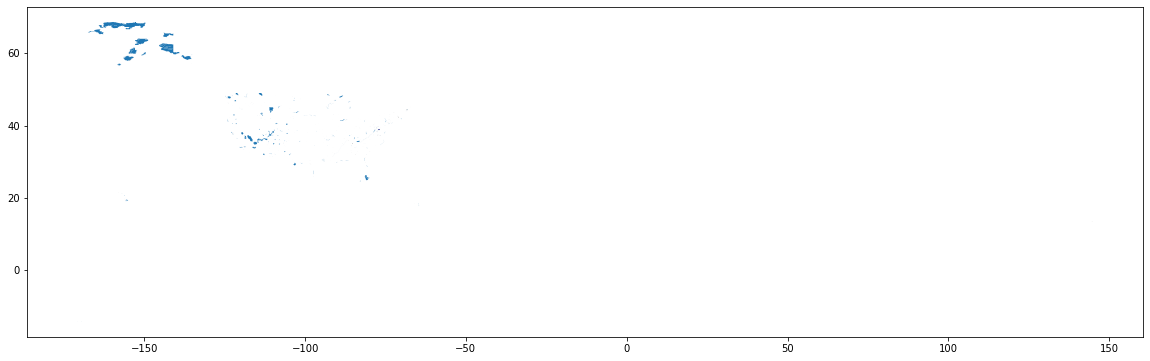

In [6]:
ax = parks.plot(figsize=(20,20))

In [ ]:
parks.set

In [7]:
fdsi

<xarray.Dataset>
Dimensions:  (lat: 585, lon: 1386, time: 41, year: 41)
Coordinates:
  * lat      (lat) float64 49.4 49.36 49.32 49.28 ... 25.19 25.15 25.11 25.07
  * lon      (lon) float64 -124.8 -124.7 -124.7 -124.6 ... -67.14 -67.1 -67.06
  * time     (time) object 1980-01-14 00:00:00 ... 2020-01-14 00:00:00
  * year     (year) int32 1980 1981 1982 1983 1984 ... 2016 2017 2018 2019 2020
Data variables:
    fdsi     (year, lat, lon) float32 ...
Attributes: (12/22)
    geospatial_bounds_crs:           EPSG:4326
    Conventions:                     CF-1.6
    geospatial_bounds:               POLYGON((-124.7666666333333 49.400000000...
    geospatial_lat_min:              25.066666666666666
    geospatial_lat_max:              49.40000000000000
    geospatial_lon_min:              -124.7666666333333
    ...                              ...
    note3:                           Data in slices after last_permanent_slic...
    note4:                           Data in slices after last_provisional_sl...
    note5:                           Days correspond approximately to calenda...
    history:                         Fri Mar 12 19:16:03 2021: ncks --mk_rec_...
    NCO:                             4.7.2
    DODS_EXTRA.Unlimited_Dimension:  time